In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from matplotlib import pyplot as plt
import numpy as np
from scipy import constants
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure import plotter
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

#Obtention de la structure et de la structure de bande du matériau
with MPRester("AzZfK75KWoi3UDJbKM3u") as m:
    structure = m.get_structure_by_material_id("mp-568588")
    bandstructure = m.get_bandstructure_by_material_id("mp-568588")

#Récupération des données de la structure de bande
a = plotter.BSPlotter(bandstructure)
b = a.bs_plot_data()
distances = b.get('distances') #chaque tableau correspond aux abscisses d'une branche
Energies = b.get('energy') #chaque tableau correspond aux ordonnées des différentes bandes pour chaque branche

In [2]:
#Obtention de la bande interdite
printmd('**Bande interdite**')
BG = bandstructure.get_band_gap()
bande = BG.get('energy')
directe = BG.get('direct')
transition = BG.get('transition')
print("L'énergie de la bande interdite vaut %f eV." %bande)
print("La bande interdite est-elle directe ? %s " %directe)   
print("La transition de la bande interdite est %s." %transition)

**Bande interdite**

L'énergie de la bande interdite vaut 1.967600 eV.
La bande interdite est-elle directe ? False 
La transition de la bande interdite est L-F.


In [3]:
#Dernière bande de valence
printmd("**Dernière bande de valence**")
vbm = bandstructure.get_vbm() 
en = vbm.get('energy')
eferm = b.get('zero_energy')
print("La dernière bande de valence est la bande numéro :")
print(vbm.get('band_index'))
printmd("La dernière bande de valence est donc la bande numéro **17** en prenant la bande d'énergie la plus négative comme étant la bande 0.")
print("L'énergie correspondante est %f eV." %en)
egraph = (vbm.get('energy') - eferm)
print("Pour le graphe (tracé plus bas), on soustrait l'énergie de Fermi à cette énergie et on obtient %i qui est bien la valeur la plus haute que l'on observe pour la bande de valence sur le graphe (bas de la bande interdite)." %egraph)

**Dernière bande de valence**

La dernière bande de valence est la bande numéro :
defaultdict(<class 'list'>, {<Spin.up: 1>: [17]})


La dernière bande de valence est donc la bande numéro **17** en prenant la bande d'énergie la plus négative comme étant la bande 0.

L'énergie correspondante est 2.459500 eV.
Pour le graphe (tracé plus bas), on soustrait l'énergie de Fermi à cette énergie et on obtient 0 qui est bien la valeur la plus haute que l'on observe pour la bande de valence sur le graphe (bas de la bande interdite).


In [4]:
#On cherche la dispersion. Pour cela on calcule la pente de chaque morceau de abnde dans chaque branche car on cherche la variation d'énergie en fonction de la distance
#On parcourt toutes les branches pour calculer la pente de la bande de valence dans chacune des branches

#Maximum et minimum de dispersion dans la bande de valence 
printmd("**Maximum et minimum de dispersion de la bande de valence**")
pente = np.zeros(9)
for i in range (0,9):
    absic = distances[i]
    maxy = max(Energies[i].get('1')[17])
    miny = min(Energies[i].get('1')[17])
    pente[i] = (maxy-miny)/(max(distances[i]) - min(distances[i]))
    
maxdisp = max(pente)
for i in range (0,len(pente)):
    if pente[i]==maxdisp:
        print("Le maximum de dispersion est situé dans la branche numéro %i en prenant la branche la plus à gauche comme étant la première branche." %(i+1))
        print("Le maximum de dispersion vaut %f." %maxdisp)
        
mindisp = min(pente)
for i in range (0,len(pente)):
    if pente[i]==mindisp:
        print("Le minimum de dispersion est situé dans la branche numéro %i en prenant la branche la plus à gauche comme étant la première branche." %(i+1))
        print("Le minimum de dispersion vaut %f." %mindisp)

**Maximum et minimum de dispersion de la bande de valence**

Le maximum de dispersion est situé dans la branche numéro 8 en prenant la branche la plus à gauche comme étant la première branche.
Le maximum de dispersion vaut 2.134746.
Le minimum de dispersion est situé dans la branche numéro 6 en prenant la branche la plus à gauche comme étant la première branche.
Le minimum de dispersion vaut 0.249022.


In [5]:
#Première bande de conduction 
printmd("**Première bande de conduction**")
cbm = bandstructure.get_cbm()
ene = cbm.get('energy')
print("La première bande de conduction est la bande numéro :")
print(cbm.get('band_index'))
printmd("La première bande de conduction est donc la bande numéro **18** en prenant la bande d'énergie la plus négative comme étant la bande 0.")
print("L'énergie correspondante vaut %f eV." %ene)
print("Pour le graphe, on soustrait l'énergie de Fermi à cette énergie et on obtient %f qui est bien la valeur la plus basse que l'on observe pour la bande de conduction sur le graphe (valeur de la bande interdite)." %(cbm.get('energy') - eferm))

**Première bande de conduction**

La première bande de conduction est la bande numéro :
defaultdict(<class 'list'>, {<Spin.up: 1>: [18]})


La première bande de conduction est donc la bande numéro **18** en prenant la bande d'énergie la plus négative comme étant la bande 0.

L'énergie correspondante vaut 4.427100 eV.
Pour le graphe, on soustrait l'énergie de Fermi à cette énergie et on obtient 1.967600 qui est bien la valeur la plus basse que l'on observe pour la bande de conduction sur le graphe (valeur de la bande interdite).


In [6]:
#Maximum et minimim de dispsersion la bande de conduction
printmd("**Maximum et minimum de dispersion de la bande de conduction**")
pente2 = np.zeros(9)
for i in range (0,9):
    absic2 = distances[i]
    maxy2 = max(Energies[i].get('1')[18])
    miny2 = min(Energies[i].get('1')[18])
    pente2[i] = (maxy2-miny2)/(max(distances[i]) - min(distances[i]))
    
maxdisp2 = max(pente2)    
for i in range (0,len(pente2)):
    if pente2[i]==maxdisp2:
        print("Le maximum de dispersion est situé dans la branche numéro %i en prenant la branche la plus à gauche comme étant la première branche." %(i+1))
        print("Le maximum de dispersion vaut %f." %maxdisp2)

mindisp2 = min(pente2)
for j in range (0,len(pente2)):
    if pente2[j]==mindisp2:
        print("Le minimum de dispersion est situé dans la branche numéro %i en prenant la branche la plus à gauche comme étant la première branche." %(j+1))
        print("Le minimum de dispersion vaut %f." %mindisp2)

**Maximum et minimum de dispersion de la bande de conduction**

Le maximum de dispersion est situé dans la branche numéro 6 en prenant la branche la plus à gauche comme étant la première branche.
Le maximum de dispersion vaut 1.447427.
Le minimum de dispersion est situé dans la branche numéro 8 en prenant la branche la plus à gauche comme étant la première branche.
Le minimum de dispersion vaut 0.146155.


**Graphe montrant les maxima de la bande de valence, le minimum de la bande de conduction et les directions dans lesquelles les bandes de valence et de conduction présentent des dispersions maximales ou minimales.**

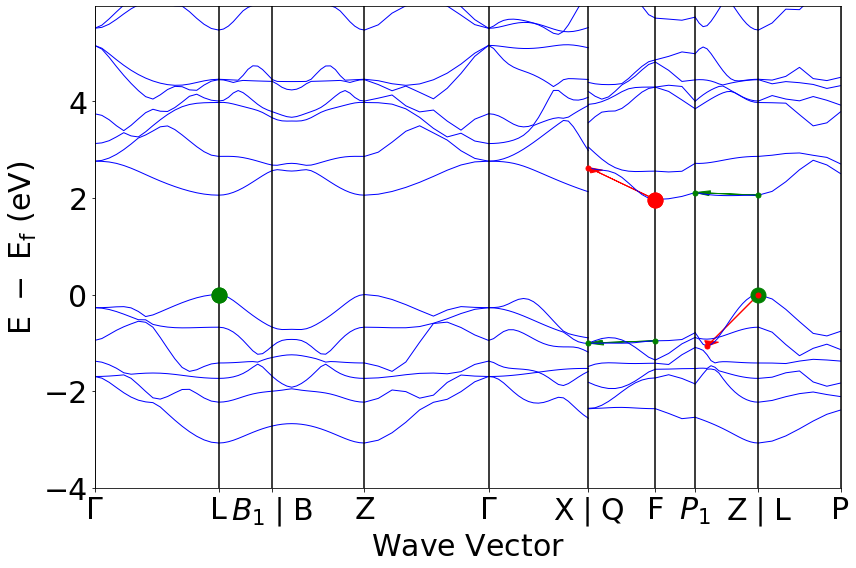

In [7]:
printmd("**Graphe montrant les maxima de la bande de valence, le minimum de la bande de conduction et les directions dans lesquelles les bandes de valence et de conduction présentent des dispersions maximales ou minimales.**")
#Obtention du graphe 
#(le graphe obtenu n'est pas identique à celui obtenu sur le site du materials project mais j'ai contacté Monsieur Rignanese qui obtient la même chose que moi)
a.get_plot()

      
#Placement des maxima de la bande de valence sur le graphe (points verts)
vbm2 = b.get('vbm')
for i in range (0,len(vbm2)):
    (x,y) = vbm2[i]
    plt.plot(x,y,'.g',markersize=30)

#Placement des minima de la bande de conduction sur le graphe (points rouges)
cbm2 = b.get('cbm')
for i in range(len(cbm2)):
    (x,y) = cbm2[i]
    plt.plot(x,y,'.r',markersize=30)
    
x1 = distances[5][0]
x2 = distances[5][len(distances[5])-1]
y1 = Energies[5].get('1')[17][0]
y2 = Energies[5].get('1')[17][len(Energies[5].get('1')[17])-1]
plt.plot(x1,y1,'.g',markersize=10)
plt.plot(x2,y2,'.g',markersize=10)
plt.arrow(x2,y2,x1-x2,y1-y2 ,head_width=0.1, head_length=0.1 , length_includes_head=True , color='green')

v1 = distances[7][0]
v2 = distances[7][len(distances[7])-1]
w1 = Energies[7].get('1')[18][0]
w2 = Energies[7].get('1')[18][len(Energies[7].get('1')[18])-1]
plt.plot(v1,w1,'.g',markersize=10)
plt.plot(v2,w2,'.g',markersize=10)
plt.arrow(v2,w2,v1-v2,w1-w2,head_width=0.1, head_length=0.1 , length_includes_head=True , color='green')

a1 = distances[5][0]
a2 = distances[5][len(distances[5])-1]
b1 = Energies[5].get('1')[18][0]
b2 = Energies[5].get('1')[18][len(Energies[5].get('1')[18])-1]
plt.plot(a1,b1,'.r',markersize=10)
plt.plot(a2,b2,'.r',markersize=10)
plt.arrow(a2,b2,a1-a2,b1-b2,head_width=0.1, head_length=0.1 , length_includes_head=True , color='red')


c1 = distances[7][3]
c2 = distances[7][len(distances[7])-1]
d1 = min(Energies[7].get('1')[16])
d2 = Energies[7].get('1')[17][len(Energies[7].get('1')[17])-1]
plt.plot(c1,d1,'.r',markersize=10)
plt.plot(c2,d2,'.r',markersize=10)
plt.arrow(c2,d2,c1-c2,d1-d2,head_width=0.1, head_length=0.1 , length_includes_head=True , color='red')

plt.show()

**Calcul de la masse effective aux sommets de la bande de valence**

La masse effective au premier maximum de la bande de valence vaut :
-8.82957116757226e-41
La masse effective au deuxième maximum de la bande de valence vaut :
-4.3242447595780816e-41


**Calcul de la masse effective à la base de la bande de conduction**

La masse effective au minimum de la bande de conduction vaut :
7.757755417518297e-41


**Graphe avec les dispersions supposées paraboliques à chaque sommet**

<Figure size 432x288 with 0 Axes>

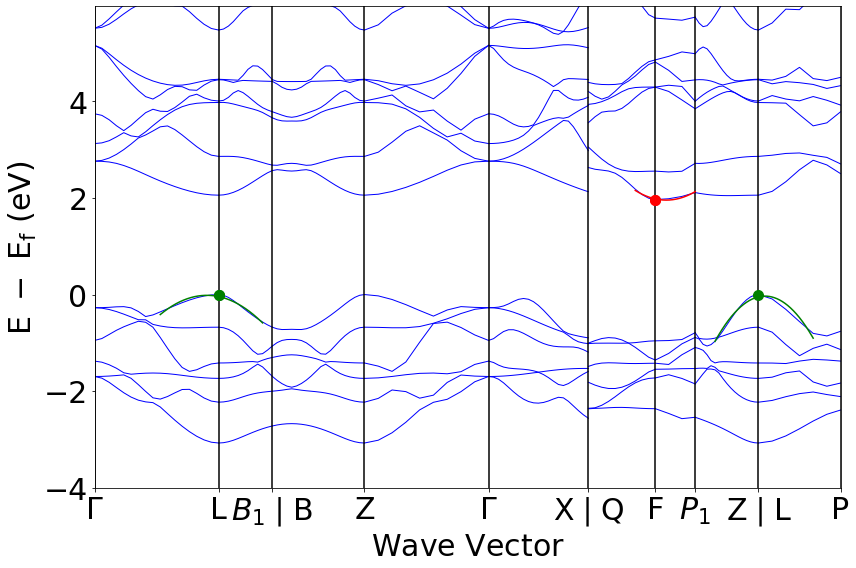

In [8]:
hbarre = constants.hbar
eV = 1.602*10**(-19)
A = 10**(-10)
#La masse effective vaut hbarre²/dérivée seconde de l'énergie selon k
#Masse effective calculée aux maxima de la bande de valence 
printmd("**Calcul de la masse effective aux sommets de la bande de valence**")

#Sommet1
ab = np.append(distances[0][9:],distances[1][1:10])
ordo1 =  np.append(Energies[0].get('1')[17][9:],Energies[1].get('1')[17][1:10])
p1 = np.polyfit(ab,ordo1,2)
ab1 = np.linspace(ab[0],ab[-1],1000)
parabole1 = np.polyval(p1,ab1)
a1 = p1[0]
masse1 = (hbarre**2)/(2*a1*A*eV)
print("La masse effective au premier maximum de la bande de valence vaut :")
print(masse1)

#Sommet2
ab2 = np.append(distances[7][5:],distances[8][1:5])
ordo2 =  np.append(Energies[7].get('1')[17][5:],Energies[8].get('1')[17][1:5])
p2 = np.polyfit(ab2,ordo2,2)
ab3 = np.linspace(ab2[0],ab2[-1],1000)
parabole2 = np.polyval(p2,ab3)
a2 = p2[0]
masse2 = (hbarre**2)/(2*a2*A*eV)
print("La masse effective au deuxième maximum de la bande de valence vaut :")
print(masse2)

#Masse effective calculée au minimum de la bande de conduction
printmd("**Calcul de la masse effective à la base de la bande de conduction**")
ab4 = np.append(distances[5][7:],distances[6])
ordo3 = np.append(Energies[5].get('1')[18][7:],Energies[6].get('1')[18])
p3 = np.polyfit(ab4,ordo3,2)
ab5 = np.linspace(ab4[0],ab4[-1],1000)
parabole3 = np.polyval(p3,ab5)
a3 = p3[0]
masse3 = (hbarre**2)/(2*a3*A*eV)
print("La masse effective au minimum de la bande de conduction vaut :")
print(masse3)

printmd("**Graphe avec les dispersions supposées paraboliques à chaque sommet**")
a = plotter.BSPlotter(bandstructure)
plt.figure()
a.get_plot()

#Placement des maxima de la bande de valence sur le graphe (points verts)
vbm2 = b.get('vbm')
for i in range (0,len(vbm2)):
    (x,y) = vbm2[i]
    plt.plot(x,y,'.g',markersize=20)

#Placement des minima de la bande de conduction sur le graphe (points rouges)
cbm2 = b.get('cbm')
for i in range(len(cbm2)):
    (x,y) = cbm2[i]
    plt.plot(x,y,'.r',markersize=20)
    
plt.plot(ab1,parabole1,'-g')
plt.plot(ab3,parabole2,'-g')
plt.plot(ab5,parabole3,'-r')
plt.show()